# 利用神经网络建立股票预测模型

神经网络想必大家都有所耳闻，理论上我们可以用神经网络做到各种各样的事情，像我们这次要做的股票预测，再像电力系统自动化中的负荷预测、甚至自动生成萌妹子头像，都可以用到神经网络。

神经网络听起来很高端，其实一点都不可怕。为方便大家理解，下面简单介绍一些神经网络中比较基本的概念，大家不需要对算法有什么很深入的了解也可以写出很棒的代码。甚至下面的概念，能看懂当然最好不过，如果看不懂或者不想看可以直接把神经网络当作一个黑匣子，把特征放进去，神经网络处理一下，就可以得到你想要的结果，神奇吧。

## 概念简述

1.神经网络的组成

神经网络由神经元组成。一个或多个**输入P**传递到神经元中，带有不同的**权重w**和**阈值b**，经过**激活函数f**处理后输出。我们写成公式就是这个样子：

$$y=f(wP+b)$$

![Neuron](neuron.png)

BP算法的核心即信号的前向传播和误差的反向传播，通过误差对每个单元的权重和阈值进行调整，使误差沿梯度方向下降，直至获得误差最小时对应的网络参数，此时对应的输出就接近预期了。

神经网络通常可以有一层输入层，一层输出层，以及若干个隐层(可以为零)。输入层的神经元个数一般等于**特征**的数量，输出层的神经元个数一般等于**标签**的数量。

![NeuralNetwork](neural_network.png)

2.分类与回归，特征与标签

不管是神经网络，任何机器学习的任务都分为这两种：分类与回归。

分类好理解，比方说我们现在有一堆水果，里面有苹果橘子香蕉菠萝，我们要通过颜色、大小、形状这些**特征**来把水果分类出来，这就是分类。分类任务的**标签**就是刚刚说的几个类别，他往往是离散的，例如上述的{苹果，橘子，香蕉，菠萝}。

回归，就更简单了。y=kx+b，x即**特征**，y即**标签**。显然我们这次的股价预测是一个回归任务。

分类是离散的，回归是连续的。

3.超参数(hpyerparameter)及其调节

大家对参数(parameter)可能比较熟悉。我们上述的y=kx+b，k与b就是参数。我们之前说的神经元中的**权重w**和**阈值b**，也是参数。

这里我们先给出参数的定义：参数即模型通过数据可以学习出的变量。

而超参数则是用来确定模型的经验变量。

简单说一下就是：参数是科学，而超参数是玄学。

诸如我们之前说的，要不要加隐层，隐层加多少层，隐层的每一层要多少个神经元，每一层用什么激活函数合适，计算中采用哪种损失函数，优化算法选什么...等等等等，这些都是超参数。

超参数的调节是依据经验的，但是没有关系，至今为止仍然没有一个确定的可以具有确切指导意义的设置超参数方法。要不要隐层，隐层多少层，多少神经元，你想怎么设置就怎么设置，动动手指头改个数字而已，不是什么难事，自己玩个几次就有经验了。

那我要怎么知道我的网络结构设置的合不合理呢？用loss曲线来看就好了。

4.欠拟合与过拟合，训练集、验证集与测试集

首先我们来解释一下欠拟合和过拟合。

欠拟合：训练样本的特征没有学到，或模型过于简单而无法识别特征，进而无法对拟合或区分目标。

过拟合：过度学习了训练样本，几乎能完美拟合训练样本，在新数据上的拟合度很差，多由模型复杂导致。

拟合：通过训练样本的学习，在训练样本和应用场合都能达到较高的拟合程度。

如下图从左到右分别是欠拟合，过拟合与正常的拟合。

![fittings](fittings.jpg)

接下来我们来解释一下上述三个集：

训练集：用来训练模型的样本。

验证集：**训练过程中没有见过的样本**，用来调整超参数(当然是手动调节啦)

测试集：实际应用中的样本，**训练过程中没有见过**，模型的正式应用或是用来检验模型效果。

之前说过，神经网络在迭代过程中**误差会逐渐减小**。我们最希望看到的情形是，损失曲线在训练集和验证集上都在逐步减小。如果损失曲线在训练集和验证集上都不下降，或者下降的很少，则说明模型拟合程度在训练集和验证集上都不高，为欠拟合。如果损失曲线在训练集上正常下降，在验证集上不下降或下降很少，则说明模型拟合程度在训练集上很高，而在验证集上不高，为过拟合。

如果欠拟合了，就把网络稍微改复杂点，该加隐层加隐层，该加神经元加神经元。

如果过拟合了，就把网络稍微改简单点，该去掉神经元和隐层就去掉。

如果已经家徒四壁，就剩下输入输出层了，怎么办呢？还有办法，可以加一个叫做Dropout()的东西，这一层会随机遗忘上一层中一定比例的内容，可以在一定程度上起到减轻过拟合的效果。

5.训练相关：step, batch, epoch

step也可以叫iteration(迭代)，指的是一次迭代。进行一次迭代后w和b就会更新一次。

batch是一次迭代中，所使用的样本量。

经历了一个epoch意味着过完了1次训练集中所有的样本。

也即：

$$epoch = batch * step$$

说了这么多，如果没有听懂，**完全没有关系**！基本上不会影响我们的预测，按我上面说的，涉及到神经网络的部分当成是黑匣子就完事了。


还有一个**好消息**！机器学习中最难的往往不是预测任务本身，搭建神经网络，通常几行，甚至一行代码就能够完成。最难的是数据处理，而数据处理我们在**Lecture 1**中已经基本上完成啦！

在之前的基础上，我们把日均线也添加到了特征里，并导出为excel方便导入。

## 预测前准备

In [1]:
# 导入必要库
import pandas as pd
import numpy as np  # numpy也是做数据处理比较常用的库，官方文档：https://numpy.org/
import tensorflow as tf  # 我们玩神经网络的库，官方网站：https://tensorflow.google.cn/
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 读数据
df = pd.read_excel('ProcessedData.xlsx')
df = df[29:].set_index(df['time'][29:]).drop(columns=['time', 'Unnamed: 0'])  # 设置时间为索引，把含空值的与不必要的列去掉

# 设置训练集、验证集和测试集的比例为7：2：1
n = len(df)
train_split = int(0.7*n)
val_split = int(0.9*n)

df.head()

E:\ANACONDA_PYTHON\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,open,close,high,low,diff,up,down,avg_up,avg_down,rsi,ema12,ema26,DIFF,dea9,macd,mov_avg_ten,mov_avg_thirty
time,,,,,,,,,,,,,,,,,
2015-05-28,10605.985,9946.946,10758.325,9837.166,-606.815,0.000,-606.815,219.393500,101.135833,68.447246,9564.955660,8984.411331,580.544329,436.101306,288.886045,9607.1330,8647.101067
2015-05-29,10251.329,10198.171,10372.672,9904.279,251.225,251.225,0.000,188.527667,101.135833,65.085061,9662.373405,9074.319455,588.053950,466.491835,243.124229,9765.2969,8732.226800
2015-06-01,10218.471,10921.445,11084.128,10209.531,723.274,723.274,0.000,307.897333,101.135833,75.274417,9856.076727,9211.143569,644.933158,502.180100,285.506116,9969.5291,8838.136933
2015-06-02,11111.054,11362.442,11420.738,10868.867,440.997,440.997,0.000,331.578500,101.135833,76.627575,10087.825231,9370.499009,717.326222,545.209324,344.233796,10198.6023,8964.401967
2015-06-03,11454.477,11106.792,11465.629,10834.436,-255.650,0.000,-255.650,256.313500,143.744167,64.069138,10244.589349,9499.113304,745.476045,585.262668,320.426753,10385.5415,9065.873300


我们要预测的收盘价是close，即第二列

In [2]:
df_mean = df[:train_split].mean(axis=0)  # 计算每个特征在训练集的均值备用，axis=0表示计算的是每个特征而不是每日各个特征的均值
df_std = df[:train_split].std(axis=0)  # 计算每个特征在训练集的标准差备用
df = (df - df_mean) / df_std  # 标准化

df = df.values
target = df[:, 1]

print(type(df))  # values后df的类型从DataFrame变成了ndarray，没有head()方法
print(df.shape)  # 计1245条数据，17个特征

<class 'numpy.ndarray'>
(1245, 17)


我们计算了每个特征的均值和标准差，并将其标准化，目的是为了对特征的量纲和数量级进行处理。不同特征量纲不同，数量级不同，如果不加以处理，网络会突出数值较高的特征在综合分析中的作用，降低数值较低的特征的作用。另外，激活函数有其适用范围，数值过大会导致神经网络的初始化过程缓慢乃至无法收敛。

这里我们采用的是z-score的方法，大家也可以利用min-max进行处理。

这里df的类型已经变为了ndarray，没有head()这个方法，通过shape易知共1245条数据，17个特征。

接下来我们来建立时间窗：

In [3]:
def window_generator(dataset, target, start_index, end_index, 
                     history_size, target_size):
    
    """
    Generate window for training, validation and testing.
    
    Parameters:
    
        dataset:collection of features; target:collection of labels;

        start_index:beginning of the slice; end_index:end of the slice;

        history_size:input width; target_size:label width.

    """
    
    features = []
    labels = []
    
    if end_index is None:
        end_index = len(dataset) - target_size
    
    start_index += history_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        features.append(dataset[indices])
        labels.append(target[i:i+target_size])
        
    return np.array(features), np.array(labels)

这个函数最终输出的是一个shape为\[时间窗个数, 时间窗长度, 特征个数\]的ndarray。大家可以自己找点数据运行一下以更好理解之。面向对象的写法可以参考tensoflow时序预测的[官方教程](https://tensorflow.google.cn/tutorials/structured_data/time_series)。

接下来是绘制损失曲线的函数：

In [4]:
def loss_curve(history):
    
    """
    Plotting the loss curve.
        
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    
    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

教程中我们会涉及到几种不同的模型，我们把训练过程封装起来：

In [5]:
EPOCHS = 100  # 设置最大训练轮数为100轮
EVALUATION_INTERNAL = 120  # step per epoch

# 数据增强参数备用
BATCH_SIZE = 100
BUFFER_SIZE = 2000


def compile_and_fit(model, train_data, val_data, patience=10):
    
    """
    Define the process of compling and fitting the model.
    
    """
    
    # 为防止过拟合，监视验证集上的loss值，在10个epoch内没有发生太大变化则终止训练
    early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=patience,
    mode='auto',
    restore_best_weights=True)  # 返回最优参数，而非训练停止时的参数
    
    # 模型编译
    model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0),  # 设置优化器
                 loss='mae')  # 设置损失函数
    
    # 模型拟合
    history = model.fit(train_data, epochs=EPOCHS,
                        steps_per_epoch=EVALUATION_INTERNAL,
                        validation_steps=50,
                        validation_data=val_data,
                        callbacks=[early_stopping])
    return history
    

我们用两种数据来进行预测。一是用过去一天的特征来预测第二天的收盘价，另一种是利用过去某几天(>=1)来预测下一天的收盘价。首先用时间窗对数据进行处理：

In [6]:
X_train_single, y_train_single = window_generator(dataset=df, target=target, start_index=0,
                                                 end_index=train_split, history_size=1, target_size=1)

X_val_single, y_val_single = window_generator(dataset=df, target=target, start_index=train_split,
                                             end_index=val_split, history_size=1, target_size=1)

X_test_single, y_test_single = window_generator(dataset=df, target=target, start_index=val_split,
                                             end_index=n-1, history_size=1, target_size=1)

X_train_multi, y_train_multi = window_generator(dataset=df, target=target, start_index=0,
                                                 end_index=train_split, history_size=5, target_size=1)

X_val_multi, y_val_multi = window_generator(dataset=df, target=target, start_index=train_split,
                                             end_index=val_split, history_size=5, target_size=1)

X_test_multi, y_test_multi = window_generator(dataset=df, target=target, start_index=val_split,
                                              end_index=n-5, history_size=5, target_size=1)

In [7]:
print(X_train_multi.shape)
print(X_val_multi.shape)
print(X_test_multi.shape)

(866, 5, 17)
(244, 5, 17)
(115, 5, 17)


进行数据增强：

In [8]:
train_single = tf.data.Dataset.from_tensor_slices((X_train_single, y_train_single))
val_single = tf.data.Dataset.from_tensor_slices((X_val_single, y_val_single))

train_multi = tf.data.Dataset.from_tensor_slices((X_train_multi, y_train_multi))
val_multi = tf.data.Dataset.from_tensor_slices((X_val_multi, y_val_multi))

train_single = train_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()  # 数据增强，shuffle只对训练集做
val_single = val_single.cache().batch(BATCH_SIZE).repeat()  # 数据增强，shuffle只对训练集做

train_multi = train_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()  # 数据增强，shuffle只对训练集做
val_multi = val_multi.cache().batch(BATCH_SIZE).repeat()  # 数据增强，shuffle只对训练集做

到这里前期工作基本上准备完成了，接下来让我们来简单试试几种模型：

## Linear Model

线性回归想必大家都很熟悉，但是用神经网络来写线性回归是怎么回事呢？下面就让我带大家一起了解吧！用神经网络来写线性回归，其实就是一个**空的全连接层**了。大家可能会觉得惊讶，用神经网络写线性回归怎么会这么简单呢？但事实就是这样，我也觉得很惊讶！那么这就是关于用神经网络来写线性回归了，是不是很简单呢？

不设置激活函数的layers.Dense()默认采用线性模型。

建立模型如下：

In [9]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

我们用前一天的特征去预测第二天的收盘价，如下图：

![narrow_window](narrow_window.png)

由于时间窗是连续的，因此我们把时间连起来，最终得到的预测结果就是这样的：

![wide_window](wide_window.png)

对线性模型进行训练：

In [10]:
linear_history = compile_and_fit(linear, train_single, val_single)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Train for 120 steps, validate for 50 steps
Epoch 1/100
120/120 [==============================] - 3s 28ms/step - loss: 0.3802 - val_loss: 0.2545
Epoch 2/100
120/120 [==============================] - 0s 4ms/step - loss: 0.2391 - val_loss: 0.1434
Epoch 3/100
120/120 [==============================] - 0s 4ms/step - loss: 0.1595 - val_loss: 0.0746
Epoch 4/100
120/120 [==============================] - 0s 4ms/step - loss: 0.1138 - val_loss: 0.0589
Epoch 5/100
120/120 [==============================] - 0s 4m

看一下loss曲线

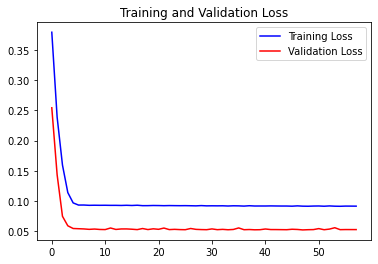

In [11]:
loss_curve(linear_history)

对比一下预测效果

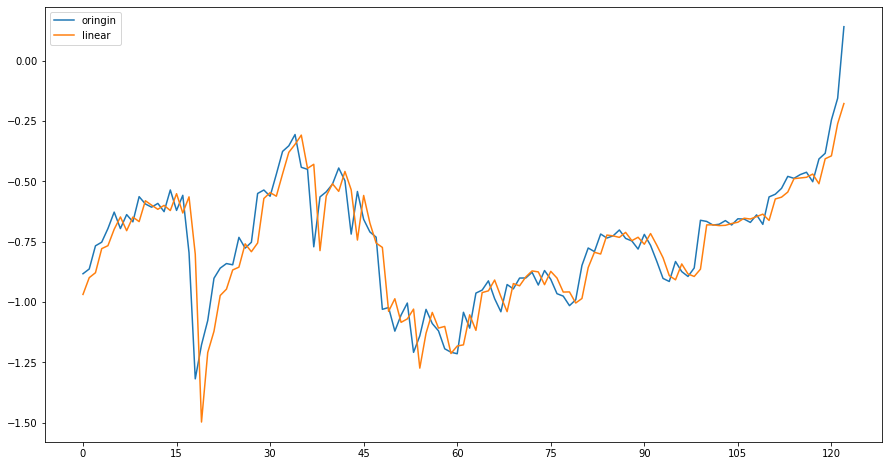

In [12]:
linear_result = linear.predict(X_test_single).reshape(-1,1)

fig = plt.figure(figsize=(15, 8))
ax = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=3)
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.plot(y_test_single, label='oringin')
plt.plot(linear_result, label='linear')

plt.legend()
plt.show()

可以看到，线性模型其实已经拟合的很好了。

数据科学中重要的不一定是模型，处理特定问题的时候如果feature engineering和data processing做的够扎实，即使模型很简单也能得到很优秀的解。

当然，如果你要处理的问题很复杂，单纯通过feature engineering和data processing可能无法达到想要的结果，这个时候我们就要用一些稍微复杂的模型了。

## Single-step: Dense Model

与之前的线性模型相同，我们用过去一天的特征来预测未来一天的收盘价：

In [13]:
single_dense = tf.keras.Sequential([
    tf.keras.layers.Dense(17),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

single_dense_history = compile_and_fit(single_dense, train_single, val_single)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Train for 120 steps, validate for 50 steps
Epoch 1/100
120/120 [==============================] - 3s 22ms/step - loss: 0.3295 - val_loss: 0.1706
Epoch 2/100
120/120 [==============================] - 1s 4ms/step - loss: 0.2046 - val_loss: 0.1095
Epoch 3/100
120/120 [==============================] - 1s 4ms/step - loss: 0.1849 - val_loss: 0.1069
Epoch 4/100
120/120 [==============================] - 1s 4ms/step - loss: 0.1766 - val_loss: 0.0952
Epoch 5/100
120/120 [==============================] - 1s 4m

loss曲线：

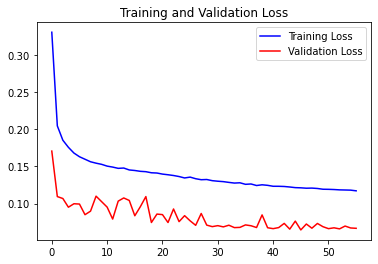

In [14]:
loss_curve(single_dense_history)

预测结果：

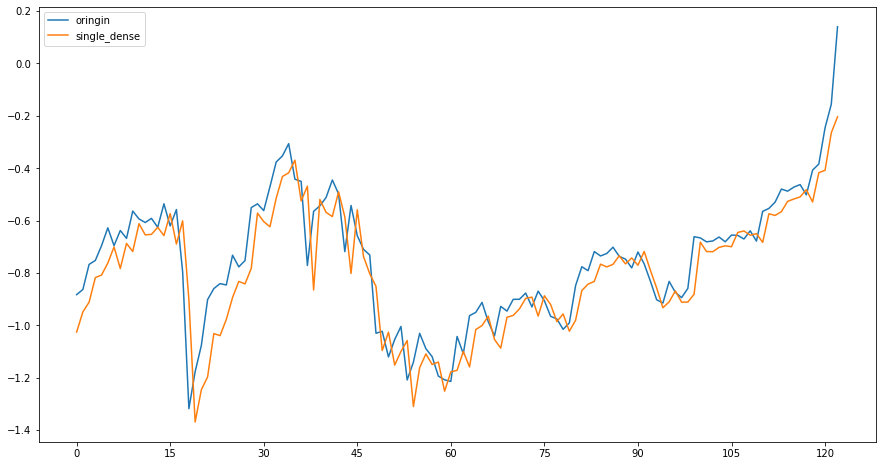

In [15]:
single_result = single_dense.predict(X_test_single).reshape(-1, 1)

fig = plt.figure(figsize=(15, 8))
ax = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=3)
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.plot(y_test_single, label='oringin')
plt.plot(single_result, label='single_dense')
plt.legend()

plt.show()

## Multi-step: LSTM
我们在之前的模型上再做一点点扩展，利用过去几天的数据来预测未来一天的收盘价。

In [24]:
lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(17),
    tf.keras.layers.Dense(1)
])

lstm_history = compile_and_fit(lstm, train_multi, val_multi)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Train for 120 steps, validate for 50 steps
Epoch 1/100
120/120 [==============================] - 7s 56ms/step - loss: 0.1634 - val_loss: 0.0906
Epoch 2/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0957 - val_loss: 0.0787
Epoch 3/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0829 - val_loss: 0.0835
Epoch 4/100
120/120 [==============================] - 1s 10ms/step - loss: 0.0786 - val_loss: 0.0673
Epoch 5/100
120/120 [==============================] - 1s

loss曲线：

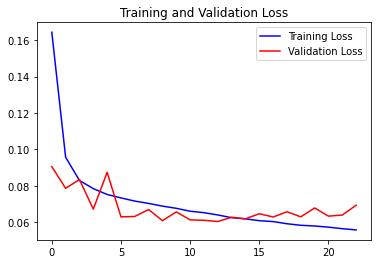

In [25]:
loss_curve(lstm_history)

预测结果：

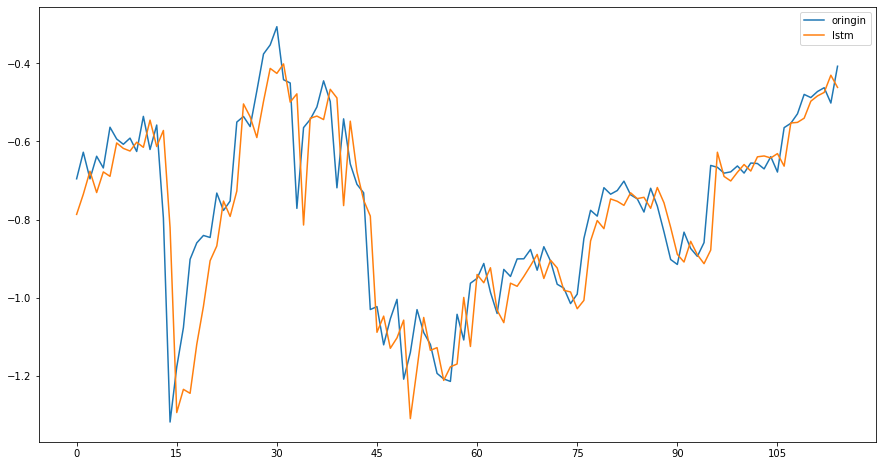

In [26]:
lstm_result = lstm.predict(X_test_multi).reshape(-1, 1)

fig = plt.figure(figsize=(15, 8))
ax = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=3)
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.plot(y_test_multi, label='oringin')
plt.plot(lstm_result, label='lstm')
plt.legend()

plt.show()

模型介绍就到此结束啦！

请大家自己尝试着去写自己的神经网络来预测你想玩的东西吧！